In [84]:
import numpy as np
import xarray as xr
import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from matplotlib.cm import get_cmap
from wrf import (getvar, interplevel, to_np, latlon_coords, get_cartopy,
                 cartopy_xlim, cartopy_ylim)
import wrf

In [85]:
ds1 = xr.open_dataset('LSPRO109_______all_timesteps_sel.nc')
ds2 = xr.open_dataset('LSPRO109_______20300902_1800_sel.nc')
wrf_file = Dataset('wrfout_d02_2021-10-06_01-00-00')

### 1C

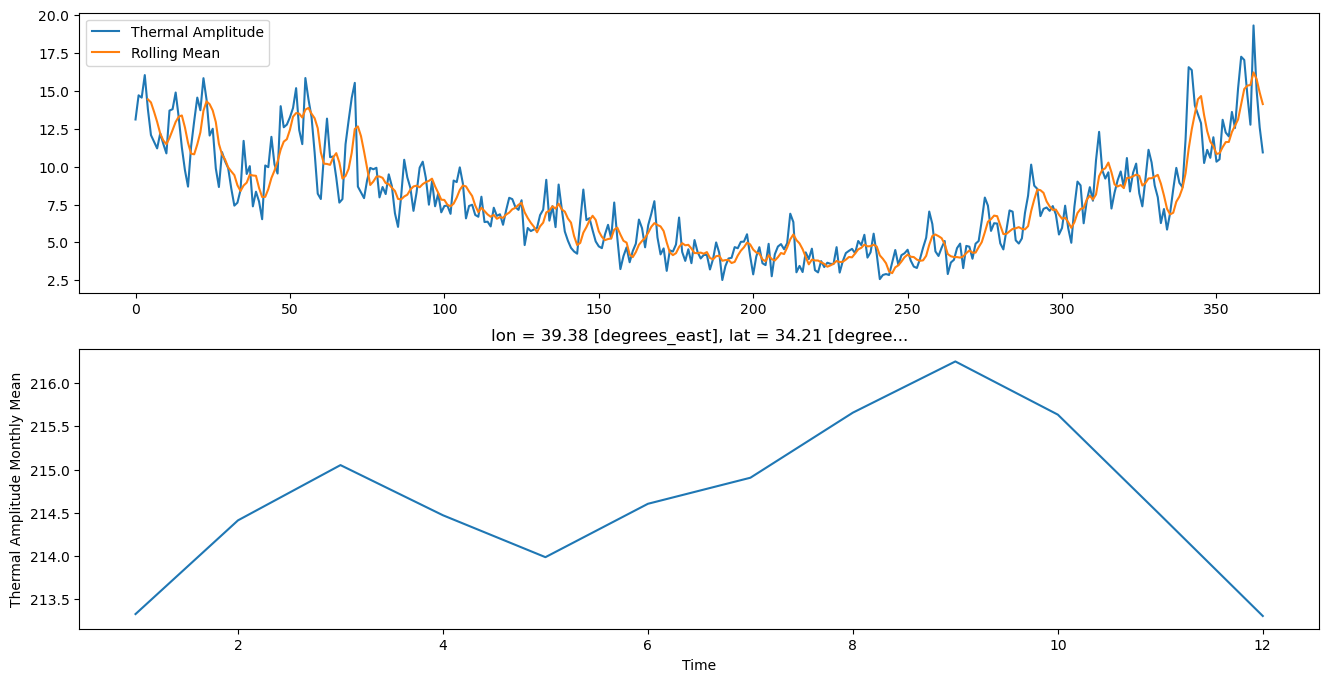

In [86]:
dmax = ds1.groupby("time.dayofyear").max("time")
dmean = ds1.groupby("time.dayofyear").mean("time")
dmin = ds1.groupby("time.dayofyear").min("time")
ther_amp = dmax - dmin
avg_month= ds1.groupby("time.month").mean("time")
#ther_amp_interp = ther_amp.interp(lat=ther_amp.lat, lon=ther_amp.lon)
a = ther_amp.tm1.isel(lon=8, lat=5, lev=1)
b = avg_month.tm1.isel(lon=8, lat=5, lev=1)
rolling_mean = a.rolling(dayofyear=5, center=False).mean()
#rolling_min = a.rolling(dayofyear=7, center=True).min()
#rolling_max = a.rolling(dayofyear=7, center=True).max()

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 8), sharex=False)

ax1.plot(a, label='Thermal Amplitude')
ax1.plot(rolling_mean, label='Rolling Mean')
#ax1.plot(rolling_min, label='Rolling Min')
#ax1.plot(rolling_max, label='Rolling Max')
ax1.legend()

b.plot(ax=ax2)
ax2.set_ylabel('Thermal Amplitude Monthly Mean')
ax2.set_xlabel('Time')

plt.show()

### 2C

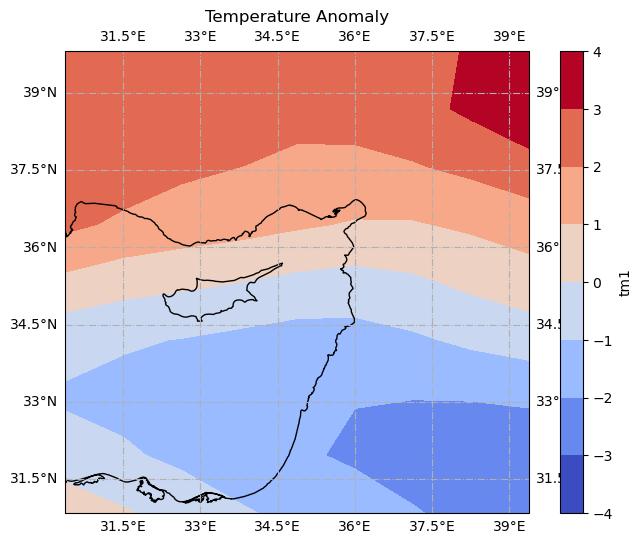

In [87]:
# Open the netCDF file and slice to get desired variable and vertical level
ds = ds1.isel(lev=10)
ds = ds['tm1']

# Compute climatology: monthly mean
climatology = ds.groupby('time.month').mean('time')

# Deduct climatology from time-frame to be inspected
anomalies = ds.groupby('time.month') - climatology

# Plotting the anomaly using cartopy
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

cs = anomalies[0].plot.contourf(ax=ax, transform=ccrs.PlateCarree(), levels=10, cmap='coolwarm')
#cbar = plt.colorbar(cs, ax=ax)#, pad=0.05, extend='both')
#cbar.set_label('Temperature Anomaly')
plt.title('Temperature Anomaly')
ax.gridlines(linestyle='-.', draw_labels=True)
plt.show()

### 3B
3B was not given as part of the exercises

### 3C
I tried my hands on the 3C but was not able to figure all that I need to make the code run until the submission date.

ValueError: x and y must have same first dimension, but have shapes (110, 110) and (24, 32, 110, 110)

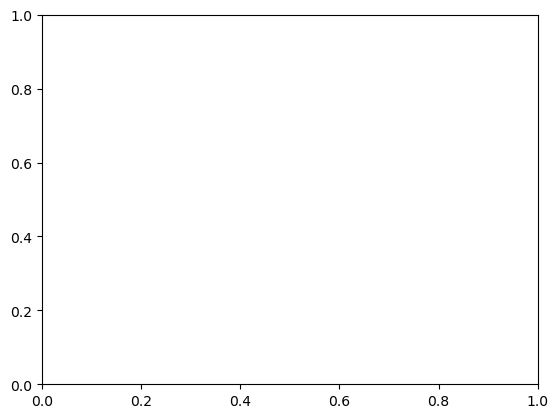

In [88]:
# Open the netCDF file
ncfile = Dataset('wrfout_d02_2021-10-06_01-00-00','r')

# Get the temperature variable and extract the midday time step
temp = wrf.getvar(ncfile, 'T', timeidx=wrf.ALL_TIMES)
temp_midday = temp.sel(Time='2021-10-06T12:00:00.000000000')

# Get the vertical profile of temperature
height = wrf.getvar(ncfile, 'height', timeidx=wrf.ALL_TIMES)
height_midday = height.sel(Time='2021-10-06T12:00:00.000000000')

profile = wrf.interplevel(temp_midday, height_midday, 52560. )

# Get start and end points of the profile
start = wrf.CoordPair(lat=profile.XLAT.values[0], lon=profile.XLONG.values[0])
end = wrf.CoordPair(lat=profile.XLAT.values[-1], lon=profile.XLONG.values[-1])

# Create a list of coordinate pairs along the profile
coords = []

for i in range(len(profile.XLAT)):
    coords.append(wrf.CoordPair(lat=profile.XLAT.values[i],lon=profile.XLONG.values[i]))
    
# Plot the temperature profile and contour of 0 degree temperature
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(profile, height, label='Temperature')
ax.contour(temp_midday, levels=[0], colors='gray')
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Height (m)')
ax.set_title('Temperature Profile at Midday')
ax.grid()
plt.show()
    

In [32]:
profile.shape
height_midday.shape
temp_midday.shape

(32, 110, 110)

In [28]:
height.shape

(24, 32, 110, 110)

In [82]:
height_midday.shape

(32, 110, 110)